### Trevor Yandow - Assignment 4

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
df = pd.read_csv("/Users/Trevor/titanic.csv")
df.head()
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [3]:
df.iloc[:5,:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
cols = df.columns.tolist()
cols

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [5]:
cols = cols[1:len(cols)] + cols[:1]
cols

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

In [6]:
df = df[cols]
df.iloc[:5,:]

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [7]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df.iloc[:5,:]

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [8]:
df.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

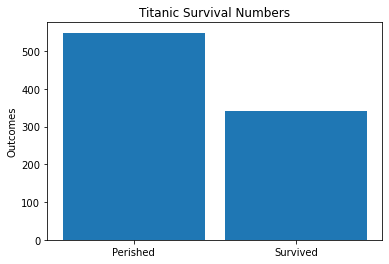

In [9]:
counts = df['Survived'].value_counts()
w=.35

plt.bar(x=[0,.4] ,height=counts, width=w)
plt.xticks([0,.4], ("Perished", "Survived"))
plt.ylabel('Outcomes')
plt.title('Titanic Survival Numbers')
plt.show()

In [10]:
avg = df.mean(axis = 0)
means = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].mean()
avg

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

In [11]:
data = df.groupby(df['Survived']).mean()
data

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [12]:
dataT = data.T
dataT['All Passenger Average'] = means
dataT

Survived,0,1,All Passenger Average
Pclass,2.531876,1.950292,2.308642
Sex,0.852459,0.318713,0.647587
Age,30.626179,28.343690,29.699118
SibSp,0.553734,0.473684,0.523008
Parch,0.329690,0.464912,0.381594
Fare,22.117887,48.395408,32.204208


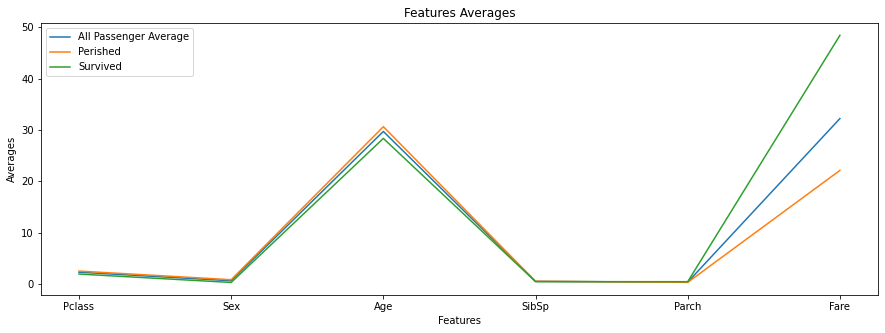

In [13]:
plt.figure(figsize=(15,5))
plt.plot(dataT['All Passenger Average'], label='All Passenger Average')
plt.plot(dataT[0], label='Perished')
plt.plot(dataT[1], label='Survived')
plt.title("Features Averages")
plt.xlabel("Features")
plt.ylabel("Averages")
plt.legend()
plt.show()

In [14]:
cols = dataT.columns.tolist()
cols = [cols[-1]] + cols[:-1]
dataT = dataT[cols]
df2 = dataT.T
df2

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
All Passenger Average,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


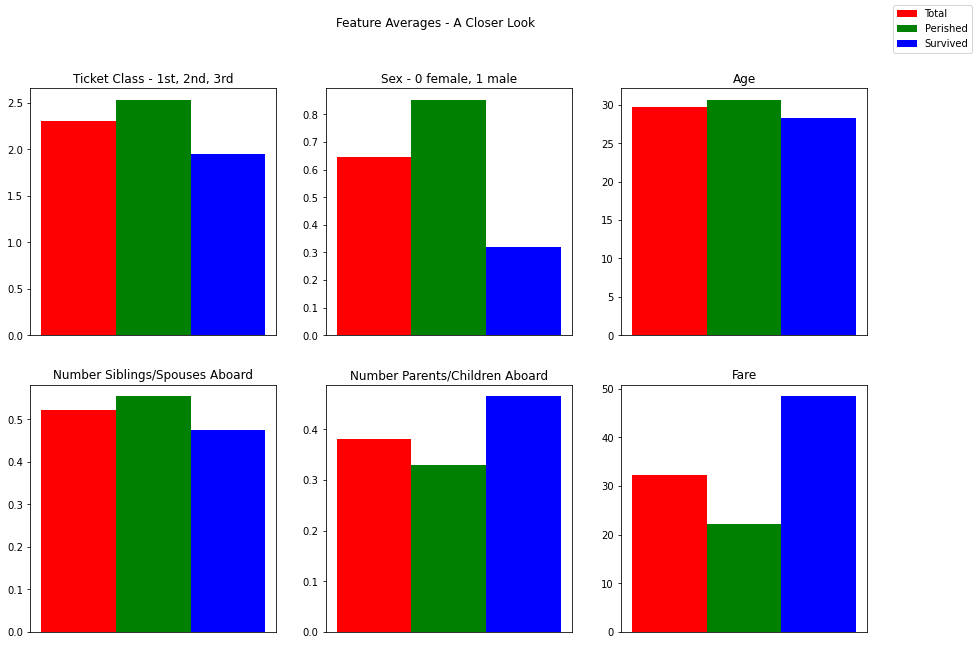

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
names = ['Ticket Class - 1st, 2nd, 3rd', 'Sex - 0 female, 1 male', 'Age', 'Number Siblings/Spouses Aboard', 'Number Parents/Children Aboard', 'Fare']
Pclass = df2['Pclass']
Sex = df2['Sex']
Age = df2['Age']
SibSp = df2['SibSp']
Parch = df2['Parch']
Fare = df2['Fare']

titles = ['Total', 'Perished', 'Survived']
ax[0,0].bar(x=0, height=0, width=0, color='red', label='Total')
ax[0,0].bar(x=0, height=0, width=0, color='green', label='Perished')
ax[0,0].bar(x=0, height=0, width=0, color='blue', label='Survived')

ax[0,0].bar(x=[0,.5,1] ,height=Pclass, color=['red','green','blue'], width=.5)
ax[0,0].axes.xaxis.set_visible(False)
ax[0,0].set_title(names[0])
ax[0,1].bar(x=[0,.5,1] ,height=Sex, color=['red','green','blue'], width=.5)
ax[0,1].axes.xaxis.set_visible(False)
ax[0,1].set_title(names[1])
ax[0,2].bar(x=[0,.5,1] ,height=Age, color=['red','green','blue'], width=.5)
ax[0,2].axes.xaxis.set_visible(False)
ax[0,2].set_title(names[2])
ax[1,0].bar(x=[0,.5,1] ,height=SibSp, color=['red','green','blue'], width=.5)
ax[1,0].axes.xaxis.set_visible(False)
ax[1,0].set_title(names[3])
ax[1,1].bar(x=[0,.5,1] ,height=Parch, color=['red','green','blue'], width=.5)
ax[1,1].axes.xaxis.set_visible(False)
ax[1,1].set_title(names[4])
ax[1,2].bar(x=[0,.5,1] ,height=Fare, color=['red','green','blue'], width=.5)
ax[1,2].axes.xaxis.set_visible(False)
ax[1,2].set_title(names[5])

fig.legend()
fig.suptitle("Feature Averages - A Closer Look")
plt.show()

In [16]:
df.corr()['Survived']

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

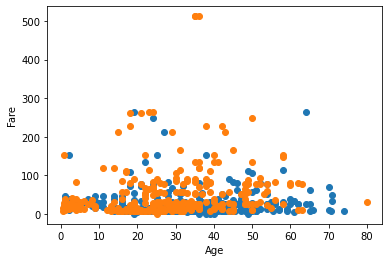

In [18]:
groups = df.groupby("Survived")
survived = groups.get_group(1)
perished = groups.get_group(0)
perishedAge = perished["Age"]
perishedFare = perished["Fare"]
survivedAge = survived["Age"]
survivedFare = survived["Fare"]

plt.scatter(perishedAge, perishedFare)
plt.scatter(survivedAge, survivedFare)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()